<html>
<head>
<style>
    body {
        font-family: 'Arial', sans-serif;
        margin-left: 40px;
        background: #ECE9E6;  /* Color de fondo general */
        background: -webkit-linear-gradient(to right, #FFFFFF, #ECE9E6);  /* Degradado para Chrome */
        background: linear-gradient(to right, #FFFFFF, #ECE9E6);  /* Degradado estándar */
    }
    .header {
        color: #2E86C1; /* Azul oscuro */
        padding-bottom: 10px;
        font-size: 32px;
        font-weight: bold;
        border-bottom: 3px solid #2E86C1; /* Borde con el mismo color para consistencia */
    }
    .subheader {
        color: #3498DB; /* Azul un poco más claro */
        padding-top: 5px;
        font-size: 24px;
    }
    .description {
        color: #5DADE2; /* Azul aún más claro para el cuerpo de texto */
        padding: 20px 0;
        font-size: 16px;
        text-align: left;
    }
    .footer {
        color: #AED6F1; /* Azul muy claro para la fecha */
        font-size: 14px;
        padding-top: 30px;
    }
</style>
</head>
<body>

<div class="header">
    Series de Tiempo (Predicción y Caos)
</div>

<div class="subheader">
    Alumno: Rodrigo Gerardo Trejo Arriaga
</div>

<div class="description">
    <strong>Título de la Práctica:</strong> A Determinar
    <br><br>
    Este trabajo se centra en el análisis y comprensión de las series de tiempo desde una perspectiva de predicción y caos. Se abordan métodos estadísticos y algoritmos predictivos para descubrir la estructura subyacente dentro de los datos dinámicos.
</div>

<div class="footer">
    Fecha de Entrega: <strong>24 de Febrero, 2024</strong>
</div>

</body>
</html>


In [37]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

In [38]:
def plotear_hist(array: np.ndarray, titulo: str, label_x: str, label_y: str, ruta_img: str, criterio: str = 'sturges') -> None:
    """
    Genera y guarda un histograma con estilos personalizados, colores aleatorios para cada barra,
    y el número de bins determinado por el criterio especificado.

    Args:
        array (np.ndarray): Array de Numpy con los datos que se quieren plasmar en el histograma.
        titulo (str): Título del histograma.
        label_x (str): Etiqueta del eje x del histograma.
        label_y (str): Etiqueta del eje y del histograma.
        ruta_img (str): Ruta donde se guardará la imagen del histograma.
        criterio (str): Método para calcular el número de bins ('sturges', 'freedman-diaconis', 'scott', 'raiz_cuadrada', 'rice').

    Returns:
        None: La función no retorna nada.
    """
    plt.style.use('dark_background')
    
    match criterio:
        case 'sturges':
            bins = int(1 + np.log2(len(array)))
            print(bins)
        case 'freedman-diaconis':
            iqr = np.subtract(*np.percentile(array, [75, 25]))
            bin_width = 2 * iqr * len(array) ** (-1/3)
            bins = int(np.ptp(array) / bin_width)
            print(bins)
        case 'scott':
            bin_width = 3.5 * np.std(array) * len(array) ** (-1/3)
            bins = int(np.ptp(array) / bin_width)
            print(bins)
        case 'raiz_cuadrada':
            bins = int(np.sqrt(len(array)))
            print(bins)
        case 'rice':
            bins = int(2 * len(array) ** (1/3))
            print(bins)
        case _:
            raise ValueError("Criterio no reconocido. Usa 'sturges', 'freedman-diaconis', 'scott', 'raiz_cuadrada', o 'rice'.")

    n, bins, patches = plt.hist(array, bins=bins, alpha=0.75, rwidth=0.85)

    for patch in patches:
        plt.setp(patch, 'facecolor', np.random.rand(3,))
        
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.title(titulo, fontsize=20, fontweight='bold', color=np.random.rand(3,))
    plt.xlabel(label_x, fontsize=15, fontstyle='italic', color=np.random.rand(3,))
    plt.ylabel(label_y, fontsize=15, fontstyle='italic', color=np.random.rand(3,))
    plt.ylim(0, max(n)*1.1)
    plt.savefig(ruta_img, format='pdf', bbox_inches='tight')
    plt.show()


In [39]:
def escribir_array(ruta_arch:str, array: np.ndarray):
    """
    Escribe los elementos de un array de Numpy en un archivo de texto, separados por comas.

    Args:
        ruta_arch (str): La ruta del archivo donde se desea guardar el array.
        array (np.ndarray): El array de Numpy que se desea escribir en el archivo.

    Returns:
        None: La función no retorna nada.
    """
    with open(ruta_arch, "w") as archivo:
        archivo.write(",".join(map(str, array)))

14


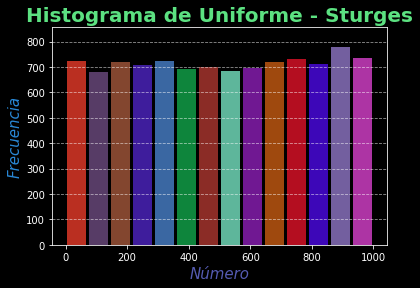

21


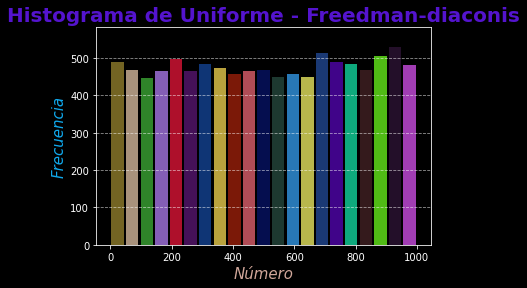

21


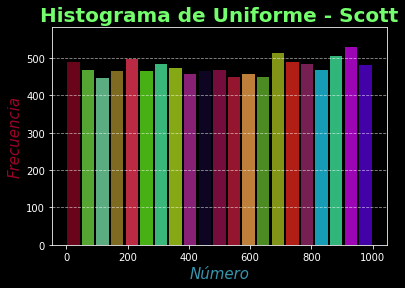

100


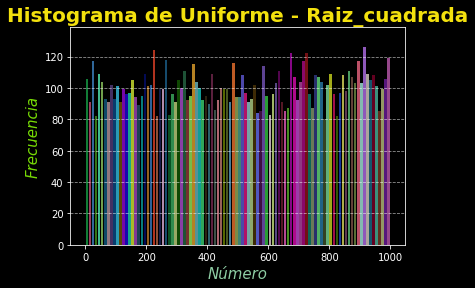

43


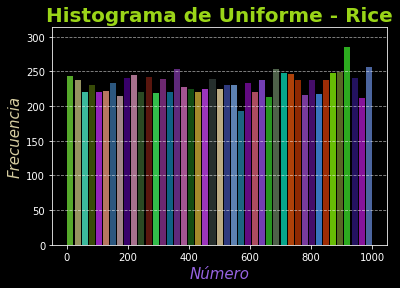

In [40]:
lim_inf, lim_sup, num_elementos = 0, 1000, 10000
randoms = np.random.randint(lim_inf, lim_sup+1, size=num_elementos)
escribir_array("randomsUniformes.txt", randoms)
criterios = ('sturges', 'freedman-diaconis', 'scott', 'raiz_cuadrada', 'rice')
for criterio in criterios:
    plotear_hist(randoms, f'Histograma de Uniforme - {criterio.capitalize()}', "Número", 'Frecuencia', f"hist_uniform_{criterio.capitalize()}.pdf", criterio)

In [41]:
def normalizar_datos(array: np.ndarray, min_val: float, max_val: float) -> np.ndarray:
    """Normaliza los elementos de un arreglo numpy a un rango específico.

    Limita los valores del arreglo entre `min_val` y `max_val`. Los valores menores a `min_val`
    se establecen en `min_val` y los mayores a `max_val` se ajustan a `max_val`.

    Args:
        array (np.ndarray): Arreglo de numpy que contiene los datos a normalizar.
        min_val (float): Valor mínimo del rango al cual los datos deben ser limitados.
        max_val (float): Valor máximo del rango al cual los datos deben ser limitados.

    Returns:
        np.ndarray: Arreglo de numpy con los datos normalizados.
    """
    result = np.empty_like(array)
    for i, val in enumerate(array):
        if val < min_val:
            result[i] = min_val
        elif val > max_val:
            result[i] = max_val
        else:
            result[i] = val
    return result

In [42]:
def inverse_erf(x: float) -> float:
    """Calcula la función de error inversa de un valor `x`.

    Utiliza una aproximación basada en una fórmula para calcular la función de error inversa,
    que es importante en estadística para la transformación de variables aleatorias.

    Args:
        x (float): Valor para el cual se calcula la función de error inversa.

    Returns:
        float: Resultado de la función de error inversa para `x`.
    """
    a = 0.147
    return np.sign(x) * np.sqrt(np.sqrt((2 / (np.pi * hist_uniform_Sturgesa) + np.log(1 - x**2) / 2)**2 - np.log(1 - x**2) / a) - (2 / (np.pi * a) + np.log(1 - x**2) / 2))


def norm_ppf(q: float, mu: float =0, sigma: float =1):
    """Calcula el valor de la función de distribución acumulativa inversa (PPF) para una distribución normal.

    Dado un cuantil `q`, devuelve el valor correspondiente en una distribución normal con media `mu`
    y desviación estándar `sigma`.

    Args:
        q (float): Cuanntil para el cual calcular el valor de la PPF.
        mu (float, optional): Media de la distribución normal. Por defecto es 0.
        sigma (float, optional): Desviación estándar de la distribución normal. Por defecto es 1.

    Returns:
        float: Valor en la distribución normal para el cuantil `q`.
    """
    return mu + sigma * np.sqrt(2) * inverse_erf(2 * q - 1)

14


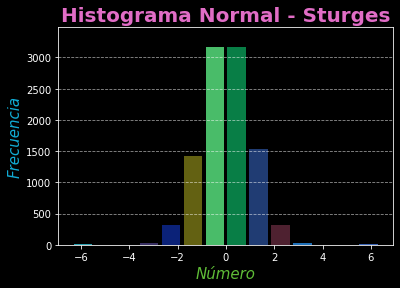

100


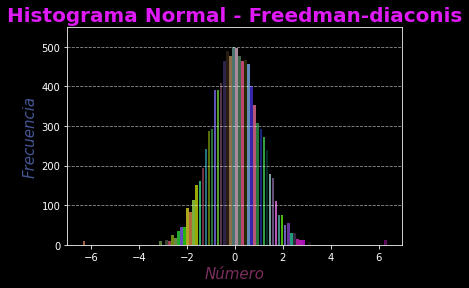

75


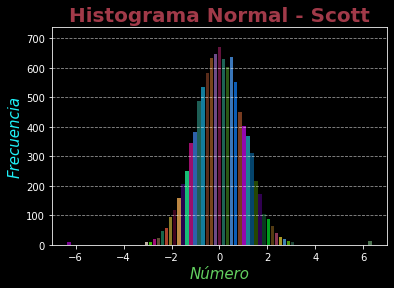

100


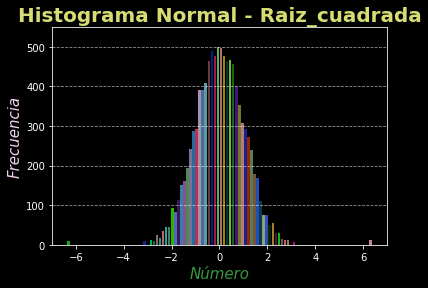

43


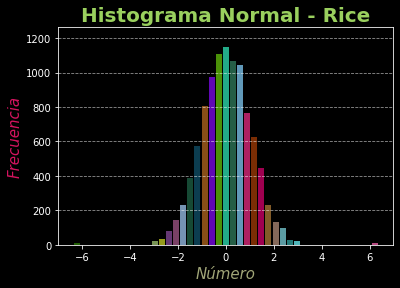

In [43]:
epsilon = 1e-10
randoms = normalizar_datos((randoms - lim_inf) / (lim_sup - lim_inf), epsilon, 1 - epsilon)
normal_transformed = norm_ppf(randoms, mu=0, sigma=1)
escribir_array("randomsNormal.txt", normal_transformed)

for criterio in criterios:
    plotear_hist(normal_transformed, f'Histograma Normal - {criterio.capitalize()}', "Número", 'Frecuencia', f"hist_normal_{criterio.capitalize()}.pdf", criterio) 


In [44]:
def gamma_aceptacion_rechazo(a:float, scale:float) -> float:
    """Genera una variable aleatoria Gamma utilizando el método de aceptación-rechazo.

    Args:
        a (float): Parámetro de forma de la distribución Gamma. Debe ser mayor que 1 para esta implementación simplificada.
        scale (float): Parámetro de escala de la distribución Gamma.

    Returns:
        float: Una variable aleatoria que sigue la distribución Gamma con los parámetros especificados.
    """
    if a < 1:
        print("Este método simplificado es para 'a' mayor a 1.")
        return None
    
    lambda_param = a - 1
    c = (a - 1)**(a - 1) * math.exp(1-a) / math.gamma(a)
    
    while True:
        y = -math.log(1 - random.random()) / lambda_param
        u = random.random()
        
        if u <= (y**(a-1) * math.exp(-y)) / (c * lambda_param**(-a) * math.exp(-lambda_param * y)):
            return y * scale


def transformar_a_gamma(randoms: list[float], a: float, scale: float) -> list[float]:
    """Transforma un conjunto de datos uniformemente distribuidos en una distribución Gamma mediante el método de aceptación-rechazo.

    Args:
        randoms (list[float]): Lista de números aleatorios uniformemente distribuidos.
        a (float): Parámetro de forma de la distribución Gamma.
        scale (float): Parámetro de escala de la distribución Gamma.

    Returns:
        list[float]: Lista de números que siguen la distribución Gamma con los parámetros especificados.
    """
    return [gamma_aceptacion_rechazo(a, scale) for _ in randoms]

14


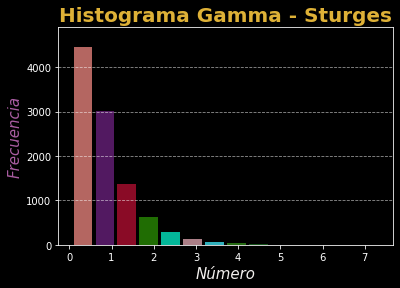

107


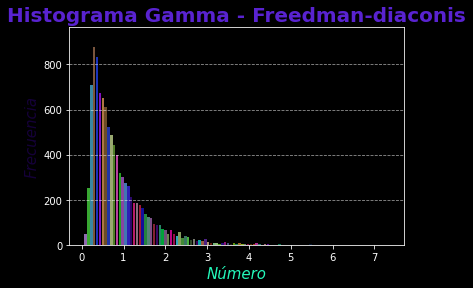

66


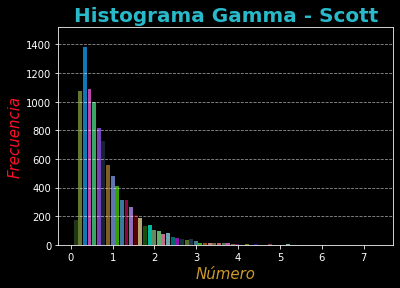

100


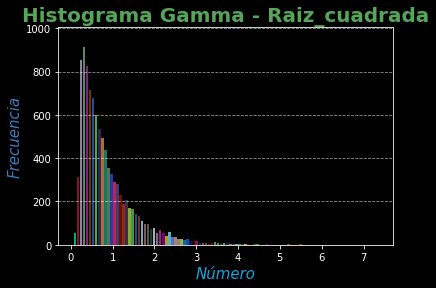

43


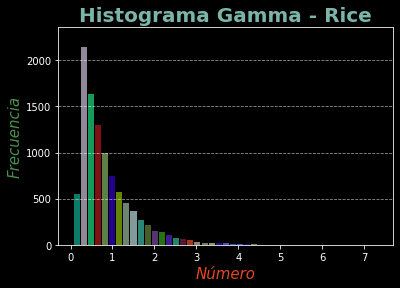

In [45]:
datos_gamma = transformar_a_gamma(randoms, 4, 2)
escribir_array("randomsGamma.txt", datos_gamma)

for criterio in criterios:
    plotear_hist(datos_gamma, f'Histograma Gamma - {criterio.capitalize()}', "Número", 'Frecuencia', f"hist_gamma_{criterio.capitalize()}.pdf", criterio)